In [13]:
#Se utilizó como guía el archivo "Ataque de Evasión y envenamiento.ipynnb" solamente que 
# implementado a nuestro modelo de lab 6
#Credits: Ataque de Evasión y envenamiento.ipynnb

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

from art.estimators.classification import KerasClassifier #No soporta TF 2

from art.attacks.evasion import FastGradientMethod
from art.utils import load_dataset
import numpy as np
import matplotlib.pyplot as plt
tf.compat.v1.disable_eager_execution()


### Evasion

In [2]:
load_model = tf.keras.models.load_model("malwareImg")

In [3]:
clasificador = KerasClassifier(load_model)

In [4]:
attack_fgm = FastGradientMethod(
    estimator=clasificador, 
    eps=0.5
    )

In [5]:
#X_train, X_test, y_train, y_test = load_model
x_train = np.load('Imagetext.npy')
test_images_adv = attack_fgm.generate(x=x_train)



c:\Users\hugo_\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


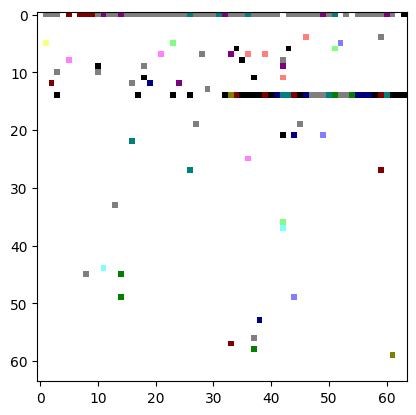

In [6]:
plt.imshow(X=test_images_adv[0])

In [7]:
y = np.loadtxt('ImagetextTest')

score_clean = load_model.evaluate(
    x=x_train, 
    y=y
    )

score_adv = load_model.evaluate(
    x=test_images_adv, 
    y=y
    )

print(f"Clean test set loss: {score_clean[0]:.2f} " 
      f"vs adversarial set test loss: {score_adv[0]:.2f}")

print(f"Clean test set accuracy: {score_clean[1]:.2f} " 
      f"vs adversarial test set accuracy: {score_adv[1]:.2f}")


c:\Users\hugo_\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Clean test set loss: 0.18 vs adversarial set test loss: 0.25
Clean test set accuracy: 0.94 vs adversarial test set accuracy: 0.91


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

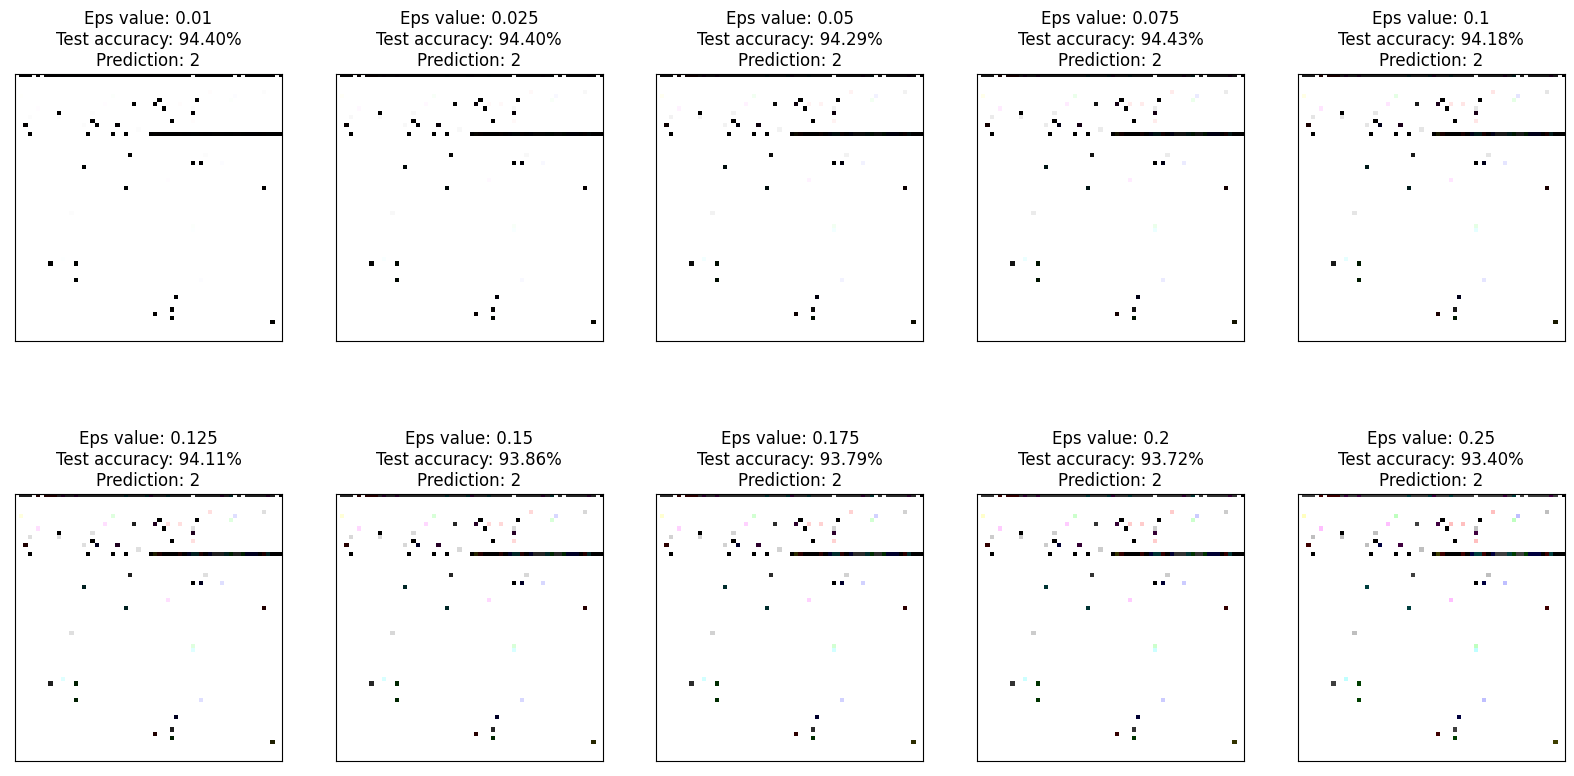

In [8]:

nrows, ncols = 2, 5

fig, axes = plt.subplots(
    nrows=nrows, 
    ncols=ncols, 
    figsize=(20, 10)
    )

eps_to_try = [0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.25]

counter = 0

for i in range(nrows):
    for j in range(ncols):    
        attack_fgsm = FastGradientMethod(
            estimator=clasificador, 
            eps=eps_to_try[counter]
            )

        test_images_adv = attack_fgsm.generate(x=x_train)

        axes[i, j].imshow(X=test_images_adv[0])

        axes[i, j].set_xticks(ticks=[])
        axes[i, j].set_yticks(ticks=[])

        test_score = clasificador._model.evaluate(
            x=test_images_adv, 
            y=y
            )[1]

        prediction = np.argmax(load_model.predict(
            x=np.expand_dims(a=test_images_adv[0], 
            axis=0)
            ))    

        axes[i, j].set_title(
            label=f"Eps value: {eps_to_try[counter]}\n"
            f"Test accuracy: {test_score * 100:.2f}%\n"
            f"Prediction: {prediction}"
            )
        counter += 1

plt.show()

### Extracción e inferencia

In [10]:
load_model2 = tf.keras.models.load_model("malwareImg")

In [11]:
clasificador = KerasClassifier(
    model=load_model2,
    )

In [19]:
from art.attacks.inference.model_inversion import MIFace

attack = MIFace(
    classifier=clasificador,
    max_iter=500, 
    batch_size=256)

In [55]:
range2 = np.arange(start=0, stop=10)

print(range2)

[0 1 2 3 4 5 6 7 8 9]


In [56]:
y = np.loadtxt('ImageTest')

x_init_average = np.zeros(shape=(10, 64, 64,3)) + np.mean(a=y, axis=0)

In [57]:
x_infer_from_average = attack.infer(
    x=x_init_average, 
    y=range2
    )

Model inversion: 100%|██████████| 1/1 [04:32<00:00, 272.50s/it]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cf1b5497-999d-407c-9261-a8b1a6121a78' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>